In [1]:
!rm -rf Used_Bikes.csv
!git clone https://github.com/aa-ryan/Second-Hand-Bike-Price-Prediction

Cloning into 'Second-Hand-Bike-Price-Prediction'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 1), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (14/14), 1.07 MiB | 5.19 MiB/s, done.


In [2]:
#Modules for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

<ipython-input-2-038044882a6a>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
#Machine learning packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [4]:
df = pd.read_csv('Second-Hand-Bike-Price-Prediction/Used_Bikes.csv')
df.shape

(32648, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [7]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [8]:
df.drop('bike_name',axis=1,inplace=True)

# **Let's Figure Out unique bike brands**

In [9]:
df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

# **Replacing Bike brands to others which are less than 1000**

In [10]:
brands = df['brand'].value_counts()
bike_brands_less_than_100 = brands[brands<=1000]
bike_brands_less_than_100

Harley-Davidson    737
Kawasaki            79
Hyosung             64
Benelli             56
Mahindra            55
Triumph             26
Ducati              22
BMW                 16
Jawa                10
MV                   4
Indian               3
Ideal                2
Rajdoot              1
LML                  1
Yezdi                1
Name: brand, dtype: int64

In [11]:
print("Other brands total",sum(bike_brands_less_than_100))

Other brands total 1077


In [12]:
others = bike_brands_less_than_100.keys()
others

Index(['Harley-Davidson', 'Kawasaki', 'Hyosung', 'Benelli', 'Mahindra',
       'Triumph', 'Ducati', 'BMW', 'Jawa', 'MV', 'Indian', 'Ideal', 'Rajdoot',
       'LML', 'Yezdi'],
      dtype='object')

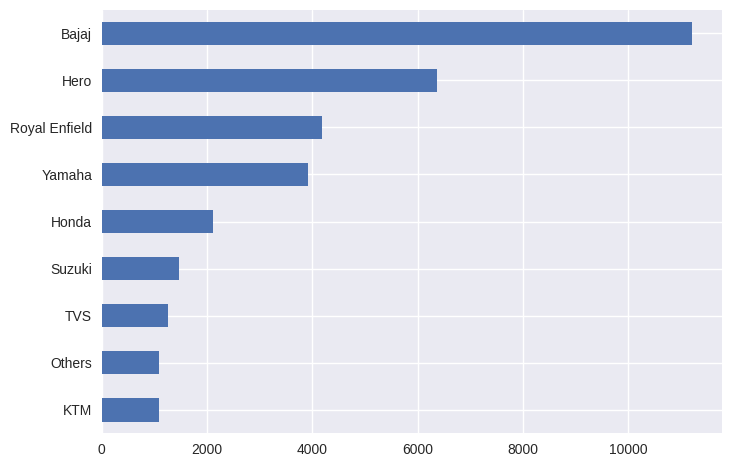

In [13]:
df['brand'].replace(others,"Others",inplace=True)
df['brand'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [14]:
bike_groups = df.groupby('brand')

In [15]:
def get_average_plot_data(col,scale=None):
    brands = df['brand'].unique()
    avgs = []
    for brand in brands:
        average = bike_groups.get_group(brand)[col].mean()
        avgs.append(average)
    df1 = pd.DataFrame({"Brand":brands,f"Average {col}":avgs})
    
    x = df1[df1.columns[1]]
    y = df1[df1.columns[0]]
    sns.barplot(data=df1,x=x,y=y)
    plt.title(f"Average {col} of various brands")
    if scale:
        plt.xscale(scale)
    plt.show()

# **Average age of each bike brand**

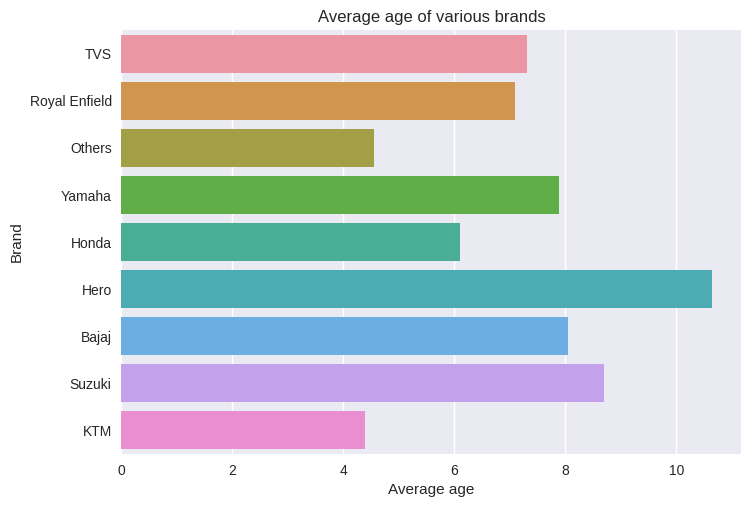

In [16]:
get_average_plot_data('age')

# **Average price of each bike brand**

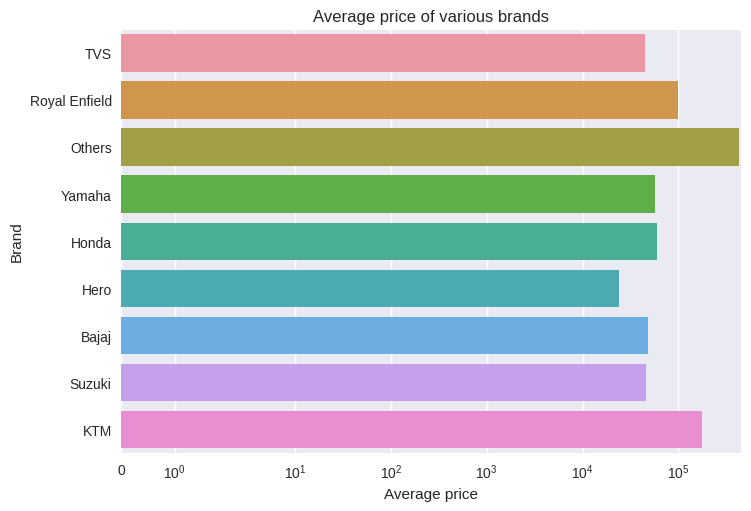

In [17]:
get_average_plot_data('price','symlog')

# **Average KMs driven of each bike brand**

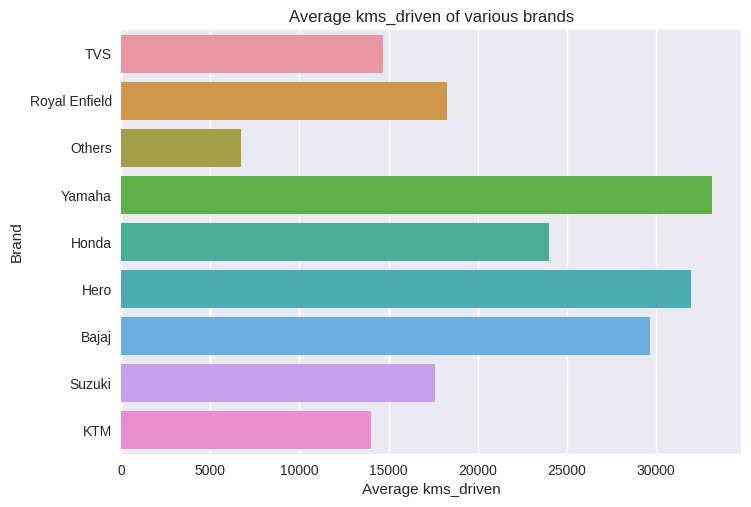

In [18]:
get_average_plot_data('kms_driven')

# **Average power of each bike brand**

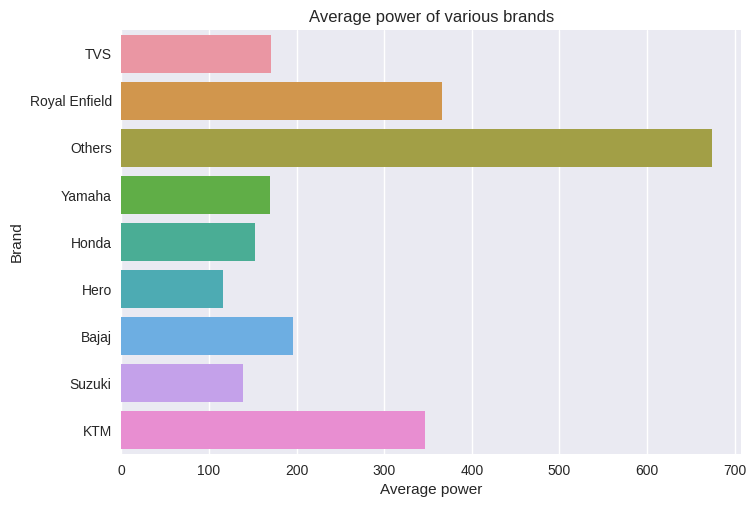

In [19]:
get_average_plot_data('power')

# **Pair Plot**

In [ ]:
cols_to_plot = ['brand', 'price', 'kms_driven', 'age', 'power']
plt.figure(figsize=(10,10))
sns.pairplot(df[cols_to_plot], hue='brand')
plt.show()

# **City Counts**

In [ ]:
df['city'].value_counts()

# **Popular cities**

In [ ]:
city_counts = df['city'].value_counts()
city_counts[city_counts>=500]

# **Setting cities to others where city frequency is < 500**

In [ ]:
other_cities = city_counts[city_counts<500]
df['city'].replace(other_cities.keys(),'Others',inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
df['city'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df.head()

In [ ]:
df['owner'].value_counts()

In [ ]:
df['owner'].replace(['Second Owner','Third Owner','Fourth Owner Or More'],'Second Owner or more',inplace=True)
df['owner'].value_counts()

# **Feature Engineering**

## **One Hot encoding**

In [ ]:
cols_to_encode = ['brand', 'city', 'owner']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.sample(10)

## **Feature Scaling** 

In [ ]:
cols_to_scale = ['kms_driven', 'age', 'power']
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

In [ ]:
i = 0
for col in cols_to_scale:
    df[col] = scalled[:,i]
    i += 1

In [ ]:
df.head()

In [ ]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

In [ ]:
new_df = pd.concat([dummies,df],axis=1)
new_df.shape

In [ ]:
new_df.head()

In [ ]:
sum(new_df.isna().sum())

# **Splitting and Training data**

In [ ]:
x ,y = new_df.drop(['price'],axis=1), new_df['price']
x.shape, y.shape

In [ ]:
y.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
y_train.shape, y_test.shape

# **Model Building and predictions**

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_train,y_train)

# **That's a descent score**

# **Cross Validation scores**

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor()]

In [ ]:
mean_scores = []
for model in models:
    print("Model:",model)
    cv_scores = cross_val_score(model, x, y, cv=5)
    print("Cross Val Scores:",cv_scores)
    print("Mean score:", cv_scores.mean())
    mean_scores.append(cv_scores.mean())
    print('\n')

In [ ]:
mds = []
for i in range(len(models)):
    mds.append(str(models[i]))
mds

In [ ]:
mean_df = pd.DataFrame({'Model':mds, 'Mean CVScore':mean_scores})
sns.barplot(data=mean_df,y='Model', x='Mean CVScore')
plt.show()

In [ ]:
svm_model = SVR()
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
mean_squared_error(y_test, y_pred_test)

# **Actual vs Predicted**

In [ ]:
def actual_vs_predicted(model,data,y_true,title=None):
    pred = model.predict(data)
    apdf = pd.DataFrame({'Actual':y_true, 'Predicted':np.round(pred)})
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=apdf, x='Actual', y='Predicted') 
    plt.title(title)
    plt.show()

In [ ]:
actual_vs_predicted(model,x_test,y_test,'Linear Regression Test Data')

# **Let's use RandomForestRegressor**

In [ ]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

In [ ]:
rfr_model.score(x_test, y_test)

In [ ]:
rfr_model.score(x_train, y_train)

In [ ]:
actual_vs_predicted(rfr_model,x_test, y_test, "RandomForestRegressor Test data")

In [ ]:
actual_vs_predicted(rfr_model,x_train, y_train, "RandomForestRegressor Train data")

# **Saving RandomForestRegressor model as file**

In [ ]:
joblib.dump(rfr_model, 'RFR-Model')

In [ ]:
!ls